In [ ]:

    
    df=pd.read_csv(f'/workspace/{init_obg.apsim_file_input}.Report.csv')
    df['county']=row['name']
    df['n_sim']=id
    df['Nitrogen_Sowing']=dosis
    lis_df.append(df)
final = pd.concat(lis_df, ignore_index=True)
final.to_parquet("/workspace/merged_results3.parquet", index=False) 

In [ ]:
gdf=gpd.read_file("/workspace/pipeline/IndianaSpatialData.geojson")
counties = ["White County", "Randolph County", "Dubois County", "Marshall County", "Clay County"]

filtered_df = gdf[gdf["name"].isin(counties)]

sampled_df = filtered_df.groupby("name", group_keys=False).apply(lambda x: x.sample(n=min(40, len(x)), random_state=42))

# sampled_df=sampled_df.reset_index()
# sampled_df=sampled_df.drop(['index'],axis=1)
sampled_df=sampled_df.iloc[127:]
sampled_df.head(20)

/tmp/ipykernel_46555/2174985032.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  field_final_sample = aoi_corn_fields_grid.groupby('index_right', group_keys=False).apply(sample_per_cell)


,geometry,id_cell,id_within_cell
0,"MULTIPOLYGON (((413798.561 4185898.574, 413766...",0,1
1,"MULTIPOLYGON (((406100.185 4191774.544, 406146...",0,2
2,"MULTIPOLYGON (((411481.091 4188056.394, 411480...",0,3
3,"MULTIPOLYGON (((412507.77 4189440.953, 412436....",0,4
4,"MULTIPOLYGON (((409926.139 4193326.611, 409925...",1,1
...,...,...,...
3996,"MULTIPOLYGON (((683980.299 4570642.383, 683976...",1298,1
3997,"MULTIPOLYGON (((683989.859 4570134.726, 683999...",1298,2
3998,"MULTIPOLYGON (((683466.444 4567895.99, 683519....",1298,3
3999,"MULTIPOLYGON (((683731.457 4561565.477, 683814...",1298,4


: 

In [ ]:
gdf_counties = gpd.read_file("/workspace/pipeline/County_Boundaries_of_Indiana_2023.geojson")
gdf_counties.head(5)


,objectid,name,nguid,local_id,source_datadesc,source_datasetid,source_featureid,source_originator,loaddate,county_fips,county_id,shape_Length,shape_Area,geometry
0,1,Adams County,urn:emergency:uid:gis:A2:0:ADAMS.IN.US,0,COUNTY BOUNDARY,COUNTYBOUNDARY.SHP,0,ADAMS COUNTY,2023-08-01 00:00:00+00:00,18001,1,1.238939,0.093862,"MULTIPOLYGON (((-84.80291 40.92257, -84.80289 ..."
1,2,Allen County,urn:emergency:uid:gis:A2:1:ALLEN.IN.US,1,COUNTY BOUNDARY,COUNTYBOUNDARY,1,ALLEN COUNTY,2023-08-28 00:00:00+00:00,18003,2,1.761745,0.183196,"MULTIPOLYGON (((-84.80356 41.26612, -84.80355 ..."
2,3,Blackford County,urn:emergency:uid:gis:A2:0:BLACKFORD.IN.US,0,COUNTY BOUNDARY,BLACKFORD_COUNTY.SHP,0,BLACKFORD COUNTY,2023-09-11 00:00:00+00:00,18009,5,0.866334,0.045550,"MULTIPOLYGON (((-85.20116 40.56726, -85.20118 ..."
3,4,Boone County,urn:emergency:uid:gis:A2:0:BOONE.IN.US,0,COUNTY BOUNDARY,COUNTY.SHP,0,BOONE COUNTY,2023-08-29 00:00:00+00:00,18011,6,1.419459,0.115698,"MULTIPOLYGON (((-86.24233 40.1774, -86.2423 40..."
4,5,Brown County,urn:emergency:uid:gis:A2:0:BROWN.IN.US,0,COUNTY BOUNDARY,COUNTY,1,BROWN COUNTY,2023-08-31 00:00:00+00:00,18013,7,1.182233,0.085527,"MULTIPOLYGON (((-86.31799 39.04886, -86.32418 ..."


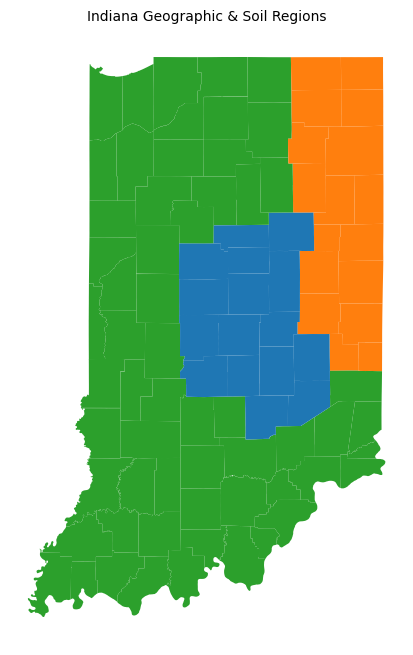

In [ ]:
# Diccionario: condado -> región
region_map = {
    # NW
    "Jasper County": "NC", "Lake County": "NC", "Laporte County": "NC", "Newton County": "NC", "Porter County": "NC", "Pulaski County": "NC", "Starke County": "NC", "White County": "NC",
    # NC
    "Kosciusko County":"NC","Wabash County":"NC","St Joseph County":"NC","Cass County": "NC", "Fulton County": "NC", "Howard County": "C", "Miami County": "NC", "Tippecanoe County": "NC", "Tipton County": "C", "Carroll County": "NC", "Clinton County": "C","Marshall County":"NC","Elkhart County":"NC",
    # NE
    "Adams County": "NE", "Allen County": "NE", "Dekalb County": "NE", "Huntington County": "NE", "Lagrange County": "NE", "Noble County": "NE", "Steuben County": "NE", "Wells County": "NE", "Whitley County": "NE",
    # WC
    "Benton County": "NC", "Fountain County": "NC", "Montgomery County": "NC", "Parke County": "NC", "Putnam County": "NC", "Vermillion County": "NC", "Warren County": "NC","Vigo County": "NC","Clay County": "NC",
    # C
    "Boone County": "C", "Hamilton County": "C", "Hancock County": "C", "Hendricks County": "C", "Johnson County": "C", "Madison County": "C", "Marion County": "C", "Morgan County": "C", "Shelby County": "C",
    # EC
    "Blackford County": "NE","Union County": "NE","Fayette County": "NE", "Delaware County": "NE", "Grant County": "C", "Henry County": "NE", "Jay County": "NE", "Randolph Count
    
    "Daviess County": "NC", "Sullivan County": "NC","Gibson County": "NC", "Knox County": "NC", "Perry County": "NC", "Pike County": "NC", "Posey County": "NC", "Spencer County": "NC", "Vanderburgh County": "NC", "Warrick County": "NC",
    # SC
    "Brown County": "NC", "Crawford County": "NC", "Dubois County": "NC", "Greene County": "NC", "Lawrence County": "NC", "Martin County": "NC", "Monroe County": "NC", "Orange County": "NC", "Owen County": "NC", "Washington County": "NC",
    # SE
    "Bartholomew County": "C", "Clark County": "NC", "Decatur County": "C", "Dearborn County": "NC", "Floyd County": "NC", "Franklin County": "NC", "Harrison County": "NC", "Jackson County": "NC", "Jefferson County": "NC", "Jennings County": "NC", "Ohio County": "NC", "Ripley County": "NC", "Scott County": "NC", "Switzerland County": "NC"
}


# Asignar la región
gdf_counties["region"] = gdf_counties["name"].map(region_map).fillna("Other/SandNI")

import matplotlib.pyplot as plt

# Definir un diccionario de colores para cada región
region_colors = {
    "C": "#1f77b4",  # azul
    "NE": "#ff7f0e",  # naranja
    "NC": "#2ca02c",  # verd
}

# Asignar un color a cada fila del GeoDataFrame según su región
gdf_counties["color"] = gdf_counties["region"].map(region_colors)

fig, ax = plt.subplots(figsize=(8, 8))
gdf_counties.plot(color=gdf_counties["color"], ax=ax)
ax.set_title("Indiana Geographic & Soil Regions", fontsize=10)
ax.axis("off")
plt.show()


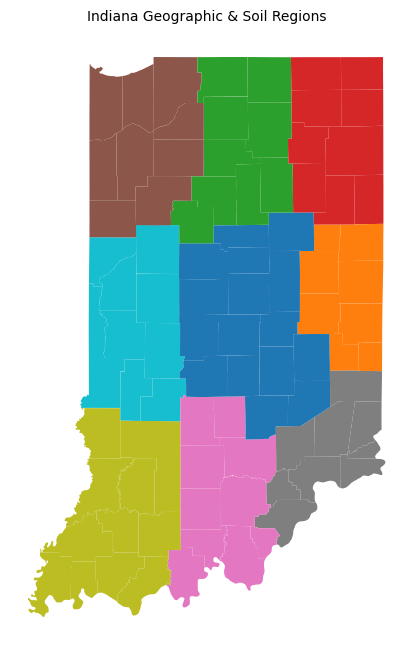

In [ ]:
# Diccionario: condado -> región
region_map = {
    # NW
    "Jasper County": "NW", "Lake County": "NW", "Laporte County": "NW", "Newton County": "NW", "Porter County": "NW", "Pulaski County": "NW", "Starke County": "NW", "White County": "NW",
    # NC
    "Kosciusko County":"NC","Wabash County":"NC","St Joseph County":"NC","Cass County": "NC", "Fulton County": "NC", "Howard County": "C", "Miami County": "NC", "Tippecanoe County": "WC", "Tipton County": "C", "Carroll County": "NC", "Clinton County": "C","Marshall County":"NC","Elkhart County":"NC",
    # NE
    "Adams County": "NE", "Allen County": "NE", "Dekalb County": "NE", "Huntington County": "NE", "Lagrange County": "NE", "Noble County": "NE", "Steuben County": "NE", "Wells County": "NE", "Whitley County": "NE",
    # WC
    "Benton County": "NW", "Fountain County": "WC", "Montgomery County": "WC", "Parke County": "WC", "Putnam County": "WC", "Vermillion County": "WC", "Warren County": "WC","Vigo County": "WC","Clay County": "WC",
    # C
    "Boone County": "C", "Hamilton County": "C", "Hancock County": "C", "Hendricks County": "C", "Johnson County": "C", "Madison County": "C", "Marion County": "C", "Morgan County": "C", "Shelby County": "C",
    # EC
    "Blackford County": "EC","Union County": "EC","Fayette County": "EC", "Delaware County": "EC", "Grant County": "C", "Henry County": "EC", "Jay County": "EC", "Randolph County": "EC", "Rush County": "C", "Wayne County": "EC",
    # SW
    "Daviess County": "SW", "Sullivan County": "SW","Gibson County": "SW", "Knox County": "SW", "Perry County": "SC", "Pike County": "SW", "Posey County": "SW", "Spencer County": "SW", "Vanderburgh County": "SW", "Warrick County": "SW",
    # SC
    "Brown County": "SC", "Crawford County": "SC", "Dubois County": "SW", "Greene County": "SW", "Lawrence County": "SC", "Martin County": "SW", "Monroe County": "SC", "Orange County": "SC", "Owen County": "WC", "Washington County": "SC",
    # SE
    "Bartholomew County": "C", "Clark County": "SE", "Decatur County": "C", "Dearborn County": "SE", "Floyd County": "SC", "Franklin County": "SE", "Harrison County": "SC", "Jackson County": "SC", "Jefferson County": "SE", "Jennings County": "SE", "Ohio County": "SE", "Ripley County": "SE", "Scott County": "SE", "Switzerland County": "SE"
}


# Asignar la región
gdf_counties["region"] = gdf_counties["name"].map(region_map).fillna("Other/SandNI")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
gdf_counties.plot(column="region", categorical=True, legend=False, ax=ax)
ax.set_title("Indiana Geographic & Soil Regions", fontsize=10)
ax.axis("off")
plt.show()


In [3]:
gdf_counties=gdf_counties.drop(['objectid','nguid','local_id','source_datadesc','source_datasetid','source_featureid','source_originator','loaddate','county_fips','county_id','shape_Length','shape_Area'],axis=1,errors='ignore')


In [2]:
gdf_farms=gpd.read_file("/workspace/pipeline/SampleIndianaPolygons.geojson")
gdf_farms=gdf_farms.drop(['index_right'],axis=1)
gdf_farms.shape

(4001, 12)

In [5]:
print(gdf_counties.crs)
print(gdf_farms.crs)

gdf_farms = gdf_farms.to_crs(gdf_counties.crs)

EPSG:4326
EPSG:26916


<Axes: >

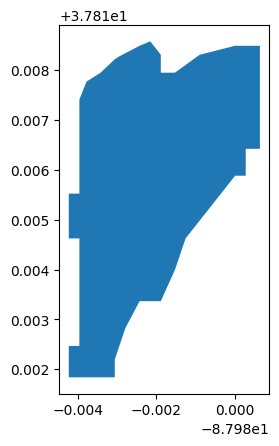

In [6]:
gdf_farms.iloc[0:1,:].plot()

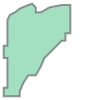

In [7]:
gdf_farms.geometry[0]

In [9]:
gdf_joined = gpd.sjoin(gdf_farms, gdf_counties, how='inner', predicate='intersects')
gdf_joined.head(5)
print(gdf_joined.shape)

(4034, 15)


NameError: name 'gdf_joined' is not defined

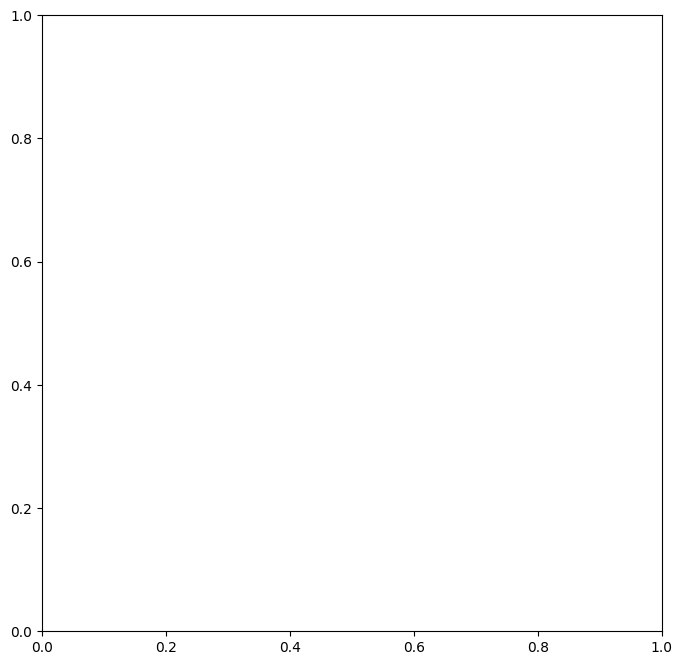

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
gdf_joined .plot(column="region", categorical=True, legend=False, ax=ax)
ax.set_title("Indiana Geographic & Soil Regions", fontsize=10)
ax.axis("off")
plt.show()

In [11]:
gdf_joined.to_file("/workspace/pipeline/IndianaSpatialData.geojson", driver="GeoJSON")

In [12]:
sampled_gdf = (
    gdf_joined.groupby('region', group_keys=False) 
       .apply(lambda x: x.sample(n=10, random_state=42)) 
)

sampled_gdf.to_file("/workspace/pipeline/Sample10perRegion.geojson", driver="GeoJSON")

/tmp/ipykernel_82133/945894092.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=10, random_state=42))
